In [ ]:
# If not already installed, do: pip install pandas fastparquet
import pandas as pd

URL_DATA = 'https://storage.dosm.gov.my/mei/mei.parquet'
#Malaysian Economic Indicators:mei
mei_df = pd.read_parquet(URL_DATA)
if 'date' in mei_df.columns: mei_df['date'] = pd.to_datetime(mei_df['date'])

print(mei_df)

          date  leading  coincident  lagging  leading_diffusion  \
0   1991-01-01     56.6        44.6     40.2          33.300000   
1   1991-02-01     57.3        45.0     40.5          50.000000   
2   1991-03-01     57.5        44.6     40.4          83.300000   
3   1991-04-01     57.5        45.1     40.0          66.700000   
4   1991-05-01     57.9        45.6     40.7          50.000000   
..         ...      ...         ...      ...                ...   
394 2023-11-01    109.9       124.1    143.2          57.142857   
395 2023-12-01    110.2       123.9    143.7          42.857143   
396 2024-01-01    112.0       124.1    144.3          57.142857   
397 2024-02-01    112.7       124.2    143.8          85.700000   
398 2024-03-01    112.2       125.0    143.1          71.400000   

     coincident_diffusion  
0               80.000000  
1               80.000000  
2               80.000000  
3               60.000000  
4               80.000000  
..                    ...  

In [ ]:
URL_DATA = 'https://storage.dosm.gov.my/ppi/ppi.parquet'
#Producer Price Index:ppi_df
ppi_df = pd.read_parquet(URL_DATA)
if 'date' in ppi_df.columns: ppi_df['date'] = pd.to_datetime(ppi_df['date'])

ppi_df.columns = [col + '_ppi' if col != 'date' else col for col in ppi_df.columns]

print(ppi_df)

          date  overall_ppi  agriculture_ppi  mining_ppi  manufacturing_ppi  \
0   2010-01-01         98.4             92.7        99.4               98.8   
1   2010-02-01         98.4             93.3        97.8               99.0   
2   2010-03-01         99.9             96.1       108.6               99.2   
3   2010-04-01         99.8             95.3       107.7               99.3   
4   2010-05-01         98.6             94.1        91.4               99.8   
..         ...          ...              ...         ...                ...   
167 2023-12-01        118.0            123.2        97.4              120.0   
168 2024-01-01        117.9            125.7        96.7              119.8   
169 2024-02-01        118.7            129.0       102.2              119.8   
170 2024-03-01        120.6            134.5       104.5              121.3   
171 2024-04-01        121.2            135.5       106.7              121.7   

     electricity_ppi  water_ppi  
0               9

In [ ]:
URL_DATA = 'https://storage.dosm.gov.my/ipi/ipi.parquet'
#Industrial Production Index (IPI):ipi_df
ipi_df = pd.read_parquet(URL_DATA)
if 'date' in ipi_df.columns: ipi_df['date'] = pd.to_datetime(ipi_df['date'])

# Pivot the data to make each series a separate column
ipi_df = ipi_df.pivot(index='date', columns='series', values='index')

ipi_df.columns = [col + '_ipi' if col != 'date' else col for col in ipi_df.columns]

print(ipi_df)

            abs_ipi  growth_mom_ipi  growth_yoy_ipi
date                                               
2015-01-01  101.029             NaN             NaN
2015-02-01   90.812         -10.113             NaN
2015-03-01  101.660          11.946             NaN
2015-04-01   97.041          -4.544             NaN
2015-05-01  100.677           3.747             NaN
...             ...             ...             ...
2023-11-01  131.833          -0.949           0.597
2023-12-01  130.120          -1.299          -0.061
2024-01-01  132.769           2.035           4.253
2024-02-01  124.409          -6.296           3.127
2024-03-01  133.779           7.531           2.400

[111 rows x 3 columns]


In [ ]:
#CPI:cpi_df
URL_DATA = 'https://storage.dosm.gov.my/cpi/cpi_2d.parquet'

cpi_df = pd.read_parquet(URL_DATA)
if 'date' in cpi_df.columns: cpi_df['date'] = pd.to_datetime(cpi_df['date'])

# Re-pivot the data to create a wide format where each division becomes a column labeled as 'd1', 'd2', etc.
division_labels = {div: f'd{int(div)}' for div in cpi_df['division'].unique() if div.isdigit()}  # Rename numeric divisions
division_labels.update({'overall': 'overall'})  # Include 'overall' without change if it exists

# Apply renaming
cpi_df = cpi_df.replace({'division': division_labels})

# Pivot the data
cpi_df = cpi_df.pivot_table(index='date', columns='division', values='index', aggfunc='first')

# Correctly reorder columns to place 'overall' last and divisions in numeric order
division_order = [f'd{i}' for i in range(1, 14)] + ['overall']  # Generate ordered division labels
ordered_columns = [col for col in division_order if col in cpi_df.columns]  # Filter existing columns

# Apply the new column order
cpi_df= cpi_df[ordered_columns]

category_labels = {
    'd1': 'Food & Beverages_cpi',
    'd2': 'Alcoholic Beverages & Tobacco_cpi',
    'd3': 'Clothing & Footwear_cpi',
    'd4': 'Housing, Water, Electricity, Gas & Other Fuels_cpi',
    'd5': 'Furnishings, Household Equipment & Routine Household Maintenance_cpi',
    'd6': 'Health_cpi',
    'd7': 'Transport_cpi',
    'd8': 'Information & Communication_cpi',
    'd9': 'Recreation, Sport & Culture_cpi',
    'd10': 'Education_cpi',
    'd11': 'Restaurant & Accommodation Services_cpi',
    'd12': 'Insurance & Financial Services_cpi',
    'd13': 'Personal Care, Social Protection & Miscellaneous Goods & Services_cpi',
    'overall' : 'overall_cpi'
}

# Rename the columns based on the category_labels dictionary
cpi_df = cpi_df.rename(columns=category_labels)


print(cpi_df)

division    Food & Beverages_cpi  Alcoholic Beverages & Tobacco_cpi  \
date                                                                  
2010-01-01                  99.0                               98.3   
2010-02-01                  99.0                               98.3   
2010-03-01                  99.0                               98.4   
2010-04-01                  99.1                               98.4   
2010-05-01                  99.5                               98.4   
...                          ...                                ...   
2023-12-01                 153.0                              171.6   
2024-01-01                 153.5                              171.5   
2024-02-01                 153.9                              171.5   
2024-03-01                 153.9                              171.8   
2024-04-01                 154.1                              171.9   

division    Clothing & Footwear_cpi  \
date                                 

In [ ]:
# Sequential inner joins
e_df = pd.merge(pd.merge(pd.merge(mei_df, ppi_df, on='date', how='inner'),ipi_df, on='date', how='inner'), cpi_df, on='date', how='inner')

# Display the result
print(e_df)


          date  leading  coincident  lagging  leading_diffusion  \
0   2015-01-01    100.3       100.2     98.9          71.400000   
1   2015-02-01     99.8        99.8     98.9          57.100000   
2   2015-03-01    101.1       100.5     99.8          42.900000   
3   2015-04-01    100.8        99.8     98.5          57.100000   
4   2015-05-01     99.4        99.4     99.6          28.600000   
..         ...      ...         ...      ...                ...   
106 2023-11-01    109.9       124.1    143.2          57.142857   
107 2023-12-01    110.2       123.9    143.7          42.857143   
108 2024-01-01    112.0       124.1    144.3          57.142857   
109 2024-02-01    112.7       124.2    143.8          85.700000   
110 2024-03-01    112.2       125.0    143.1          71.400000   

     coincident_diffusion  overall_ppi  agriculture_ppi  mining_ppi  \
0               83.300000        104.1             95.2        88.8   
1               50.000000        104.6             95

In [ ]:
from google.colab import files

e_df.to_csv('Economy.csv', index=False)
files.download('Economy.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import MeanSquaredError

lstm_df=e_df.dropna()

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(lstm_df.drop(['leading','date'], axis=1))
scaled_target = scaler.fit_transform(lstm_df[['leading']])

# Combine scaled features and target into one array
data_scaled = np.hstack((scaled_features, scaled_target))

# Convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    num_features = dataset.shape[1] - 1  # minus the target column
    for i in range(len(dataset) - look_back):
        end_ix = i + look_back
        if end_ix > len(dataset)-1:
            break
        seq_x, seq_y = dataset[i:end_ix, :-1], dataset[end_ix, -1]
        X.append(seq_x)
        Y.append(seq_y)
    return np.array(X), np.array(Y)

# Parameters
look_back = 3  # Number of previous time steps to consider for each output

# Create dataset with the specified look back
train_size = int(len(data_scaled) * 0.67)
test_size = len(data_scaled) - train_size
train, test = data_scaled[0:train_size, :], data_scaled[train_size:len(data_scaled), :]

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], look_back, testX.shape[2]))

# Create and fit the LSTM network
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, trainX.shape[2])))  # Note the change here
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

# Make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# Invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Calculate and print root mean squared error
trainScore = np.sqrt(MeanSquaredError()(trainY[0], trainPredict[:,0]))
testScore = np.sqrt(MeanSquaredError()(testY[0], testPredict[:,0]))
print(f'Train Score: {trainScore:.2f} RMSE')
print(f'Test Score: {testScore:.2f} RMSE')


Epoch 1/100
63/63 - 6s - loss: 0.0425 - 6s/epoch - 91ms/step
Epoch 2/100
63/63 - 0s - loss: 0.0250 - 465ms/epoch - 7ms/step
Epoch 3/100
63/63 - 0s - loss: 0.0177 - 342ms/epoch - 5ms/step
Epoch 4/100
63/63 - 1s - loss: 0.0130 - 514ms/epoch - 8ms/step
Epoch 5/100
63/63 - 1s - loss: 0.0124 - 681ms/epoch - 11ms/step
Epoch 6/100
63/63 - 1s - loss: 0.0213 - 549ms/epoch - 9ms/step
Epoch 7/100
63/63 - 1s - loss: 0.0132 - 529ms/epoch - 8ms/step
Epoch 8/100
63/63 - 0s - loss: 0.0100 - 478ms/epoch - 8ms/step
Epoch 9/100
63/63 - 1s - loss: 0.0108 - 551ms/epoch - 9ms/step
Epoch 10/100
63/63 - 0s - loss: 0.0126 - 405ms/epoch - 6ms/step
Epoch 11/100
63/63 - 0s - loss: 0.0088 - 256ms/epoch - 4ms/step
Epoch 12/100
63/63 - 0s - loss: 0.0084 - 298ms/epoch - 5ms/step
Epoch 13/100
63/63 - 0s - loss: 0.0074 - 209ms/epoch - 3ms/step
Epoch 14/100
63/63 - 0s - loss: 0.0074 - 225ms/epoch - 4ms/step
Epoch 15/100
63/63 - 0s - loss: 0.0082 - 278ms/epoch - 4ms/step
Epoch 16/100
63/63 - 0s - loss: 0.0075 - 237ms/epo

In [ ]:
print(e_df.isnull().sum())

date                                                                      0
leading                                                                   0
coincident                                                                0
lagging                                                                   0
leading_diffusion                                                         0
coincident_diffusion                                                      0
overall_ppi                                                               0
agriculture_ppi                                                           0
mining_ppi                                                                0
manufacturing_ppi                                                         0
electricity_ppi                                                           0
water_ppi                                                                 0
abs_ipi                                                                   0
growth_mom_i

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature selection
features = ['coincident', 'lagging', 'leading_diffusion', 'coincident_diffusion', 'overall_ppi', 'abs_ipi', 'overall_cpi']
X = e_df[features]
y = e_df['leading']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting the test set results
y_pred = model.predict(X_test)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Optionally, display the coefficients of the model
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 2.25332267247554
R² Score: 0.8928917518429724
                      Coefficient
coincident              -0.065874
lagging                  0.430316
leading_diffusion        0.045845
coincident_diffusion    -0.003615
overall_ppi              0.207736
abs_ipi                  0.130428
overall_cpi             -0.764740


In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 4.4 MB/s eta 0:00:00


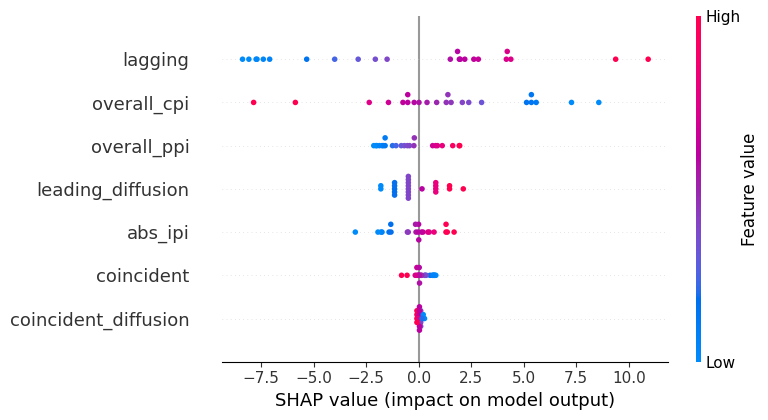

In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Plot the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=features)



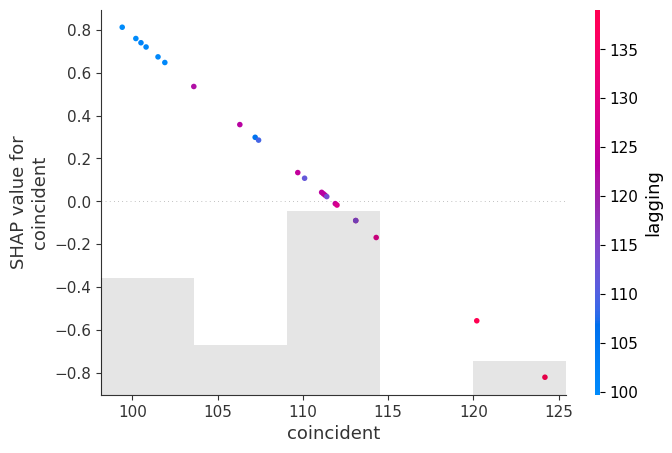

In [ ]:
# Plot the SHAP values for the first feature
shap.plots.scatter(shap_values[:,0], color=shap_values)


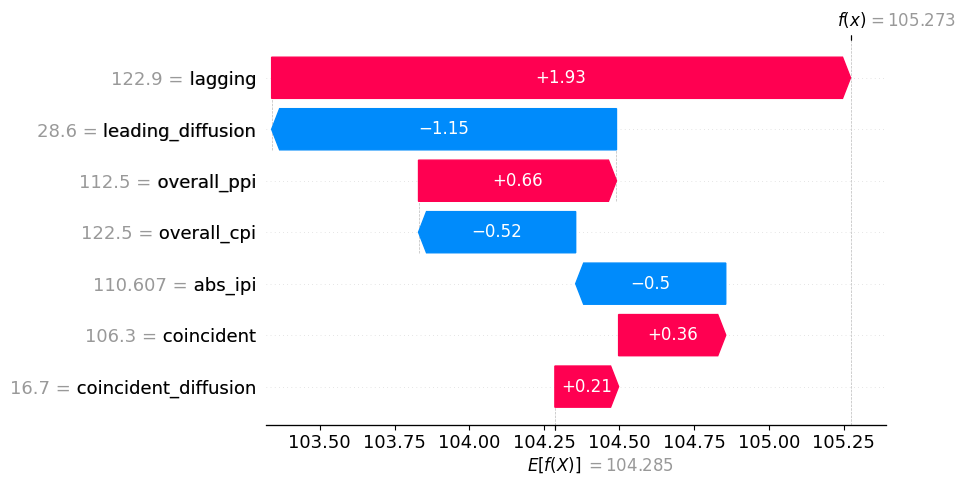

In [ ]:
# Waterfall plot for the first prediction in the test set
shap.plots.waterfall(shap_values[0])


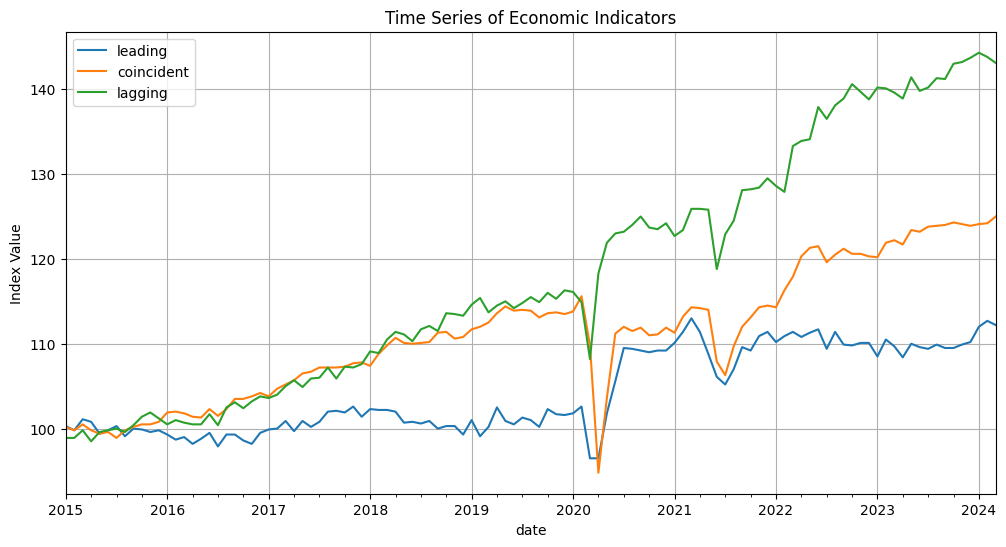

In [ ]:
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
e_df.plot(x='date', y=['leading', 'coincident', 'lagging'], ax=ax)
ax.set_title('Time Series of Economic Indicators')
ax.set_ylabel('Index Value')
ax.grid(True)
plt.show()


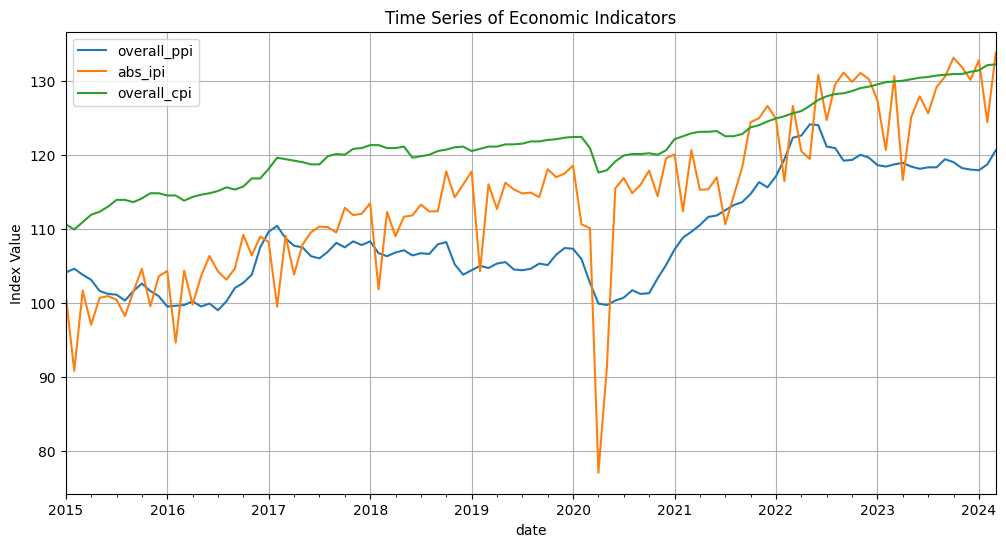

In [ ]:
 # Plotting
fig, ax = plt.subplots(figsize=(12, 6))
e_df.plot(x='date', y=['overall_ppi','abs_ipi','overall_cpi'], ax=ax)
ax.set_title('Time Series of Economic Indicators')
ax.set_ylabel('Index Value')
ax.grid(True)
plt.show()

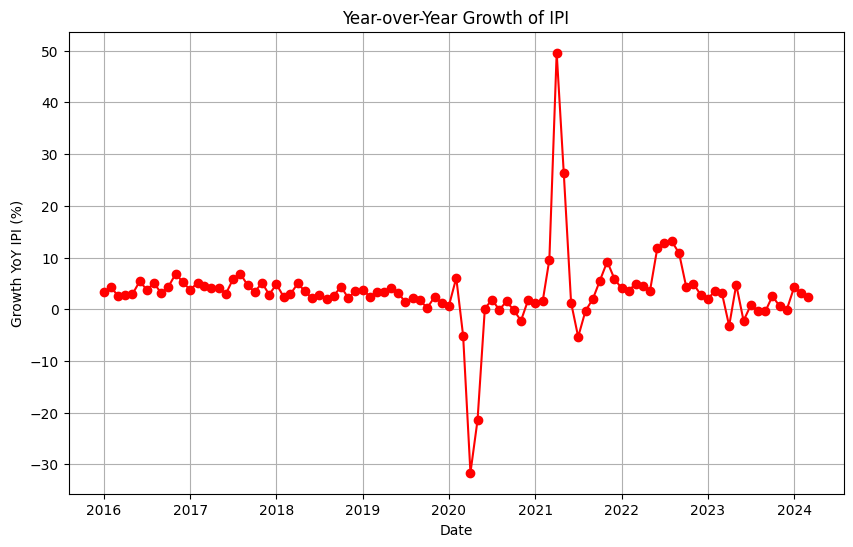

In [ ]:
# Plotting Year-over-Year growth of IPI
plt.figure(figsize=(10, 6))
plt.plot(e_df['date'], e_df['growth_yoy_ipi'], marker='o', linestyle='-', color='r')
plt.title('Year-over-Year Growth of IPI')
plt.xlabel('Date')
plt.ylabel('Growth YoY IPI (%)')
plt.grid(True)
plt.show()


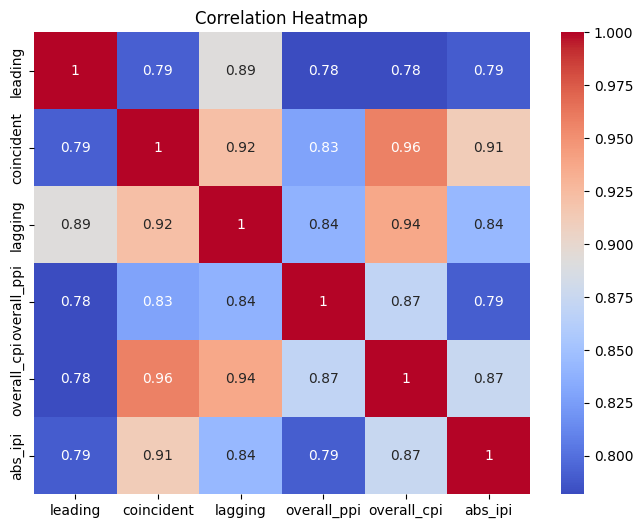

In [ ]:
import seaborn as sns

# Selecting a subset of columns for correlation
subset = e_df[['leading', 'coincident', 'lagging', 'overall_ppi', 'overall_cpi', 'abs_ipi']]

# Calculating correlation matrix
corr_matrix = subset.corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


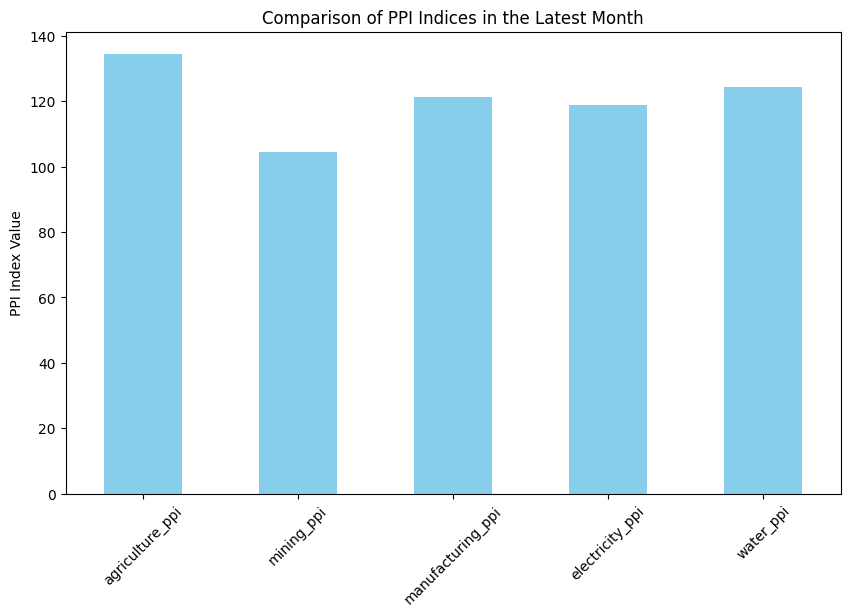

In [ ]:
# Selecting last row and relevant columns for bar chart
last_values = e_df.iloc[-1][['agriculture_ppi', 'mining_ppi', 'manufacturing_ppi', 'electricity_ppi', 'water_ppi']]

# Plotting bar chart
plt.figure(figsize=(10, 6))
last_values.plot(kind='bar', color='skyblue')
plt.title('Comparison of PPI Indices in the Latest Month')
plt.ylabel('PPI Index Value')
plt.xticks(rotation=45)
plt.show()


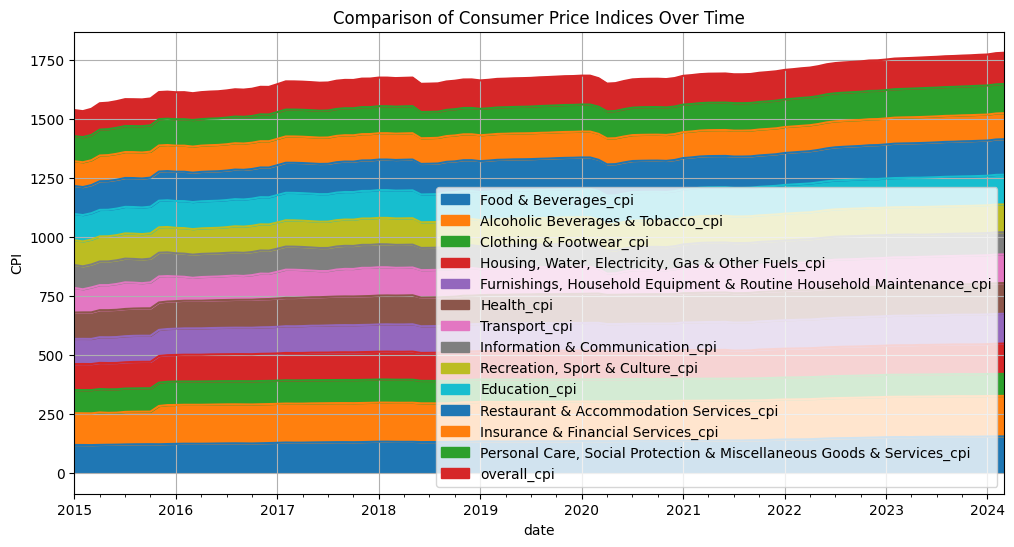

In [ ]:
cpi_columns = [col for col in e_df.columns if 'cpi' in col.lower()]

# Plotting
e_df.plot(x='date', y=cpi_columns, kind='area', figsize=(12, 6))
plt.title('Comparison of Consumer Price Indices Over Time')
plt.ylabel('CPI')
plt.grid(True)
plt.show()


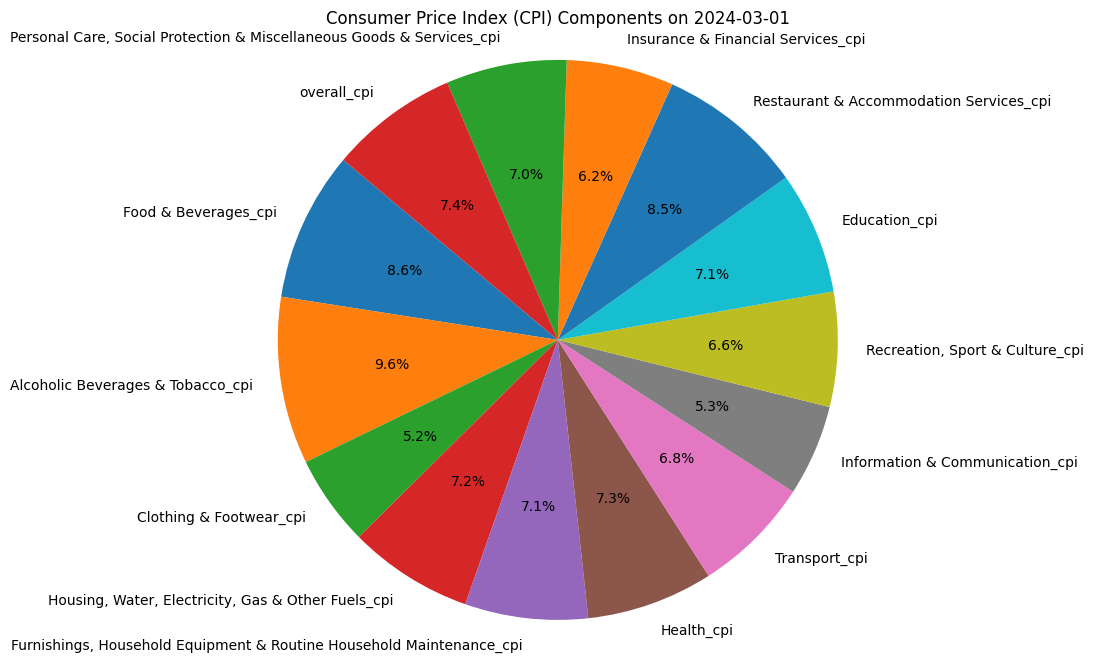

In [ ]:
selected_date = '2024-03-01'

# Filter the DataFrame for the selected date
selected_row = e_df[e_df['date'] == selected_date]
if not selected_row.empty:
    # Extract CPI values for the selected components on the selected date
    cpi_values = selected_row[cpi_columns].values.flatten()

    # Plotting the pie chart
    plt.figure(figsize=(12, 8))
    plt.pie(cpi_values, labels=cpi_columns, autopct='%1.1f%%', startangle=140)
    plt.title(f'Consumer Price Index (CPI) Components on {selected_date}')
    plt.axis('equal')
    plt.show()
else:
    print(f"No data available for the selected date: {selected_date}")

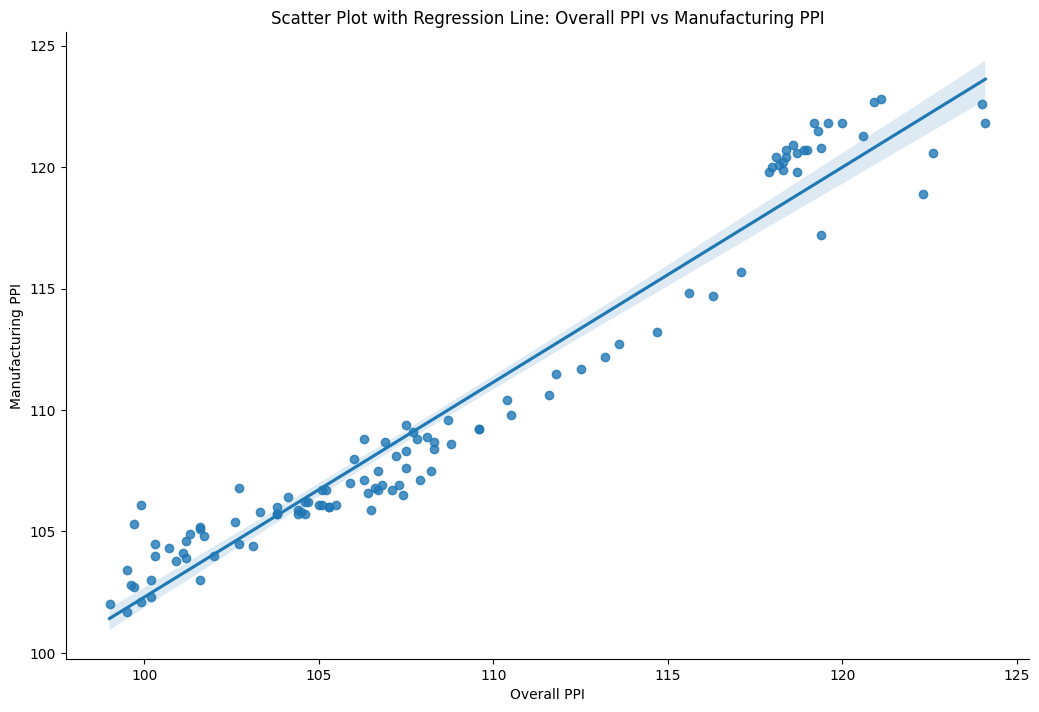

In [ ]:
sns.lmplot(x='overall_ppi', y='manufacturing_ppi', data=e_df, aspect=1.5, height=7)
plt.title('Scatter Plot with Regression Line: Overall PPI vs Manufacturing PPI')
plt.xlabel('Overall PPI')
plt.ylabel('Manufacturing PPI')
plt.show()


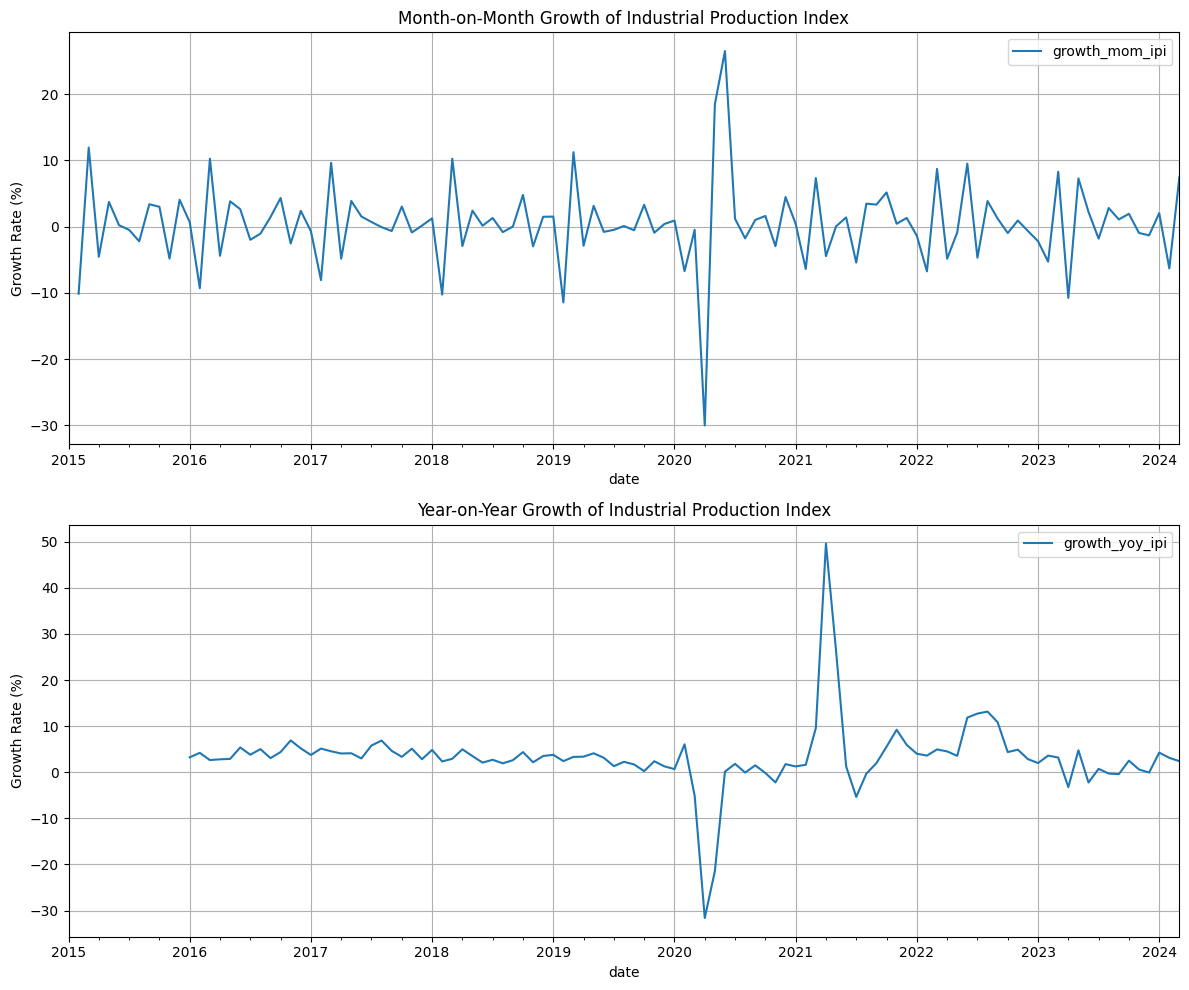

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(12, 10))
e_df.plot(x='date', y='growth_mom_ipi', ax=ax[0])
ax[0].set_title('Month-on-Month Growth of Industrial Production Index')
ax[0].set_ylabel('Growth Rate (%)')
ax[0].grid(True)

e_df.plot(x='date', y='growth_yoy_ipi', ax=ax[1])
ax[1].set_title('Year-on-Year Growth of Industrial Production Index')
ax[1].set_ylabel('Growth Rate (%)')
ax[1].grid(True)

plt.tight_layout()
plt.show()
